In [6]:
# Import necessary libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


## Load the dataset

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
y_train[3]

1

In [5]:
y_train[2]

4

#Display the Dataset

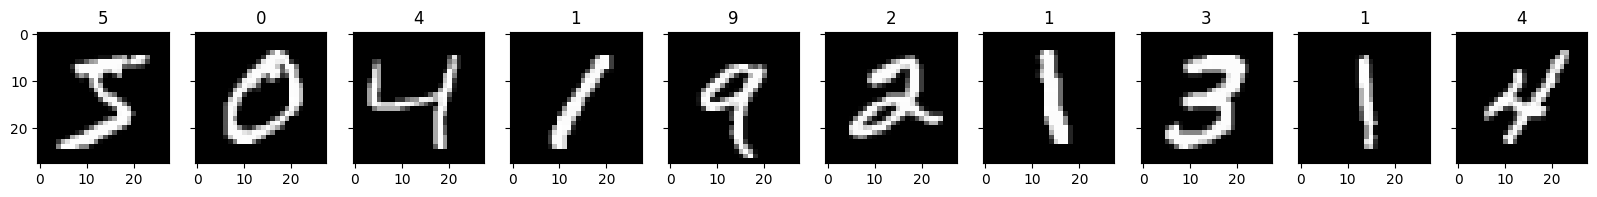

In [8]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()

In [9]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [31]:
# Reshape the images to include a channel dimension (28, 28, 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [11]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


## Build the CNN model architecture

In [12]:
model = Sequential()

In [13]:
# 1stconvolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))    # 1st max pooling layer

# 2nd convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))    # 2nd max pooling layer

# 3rd convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# 4th convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,246 (1.64 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model

In [16]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.7993 - loss: 0.5987 - val_accuracy: 0.9777 - val_loss: 0.0740
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 136s 105ms/step - accuracy: 0.9790 - loss: 0.0665 - val_accuracy: 0.9833 - val_loss: 0.0598
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9865 - loss: 0.0435 - val_accuracy: 0.9840 - val_loss: 0.0544
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.9902 - loss: 0.0313 - val_accuracy: 0.9868 - val_loss: 0.0481
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9924 - loss: 0.0244 - val_accuracy: 0.9867 - val_loss: 0.0480
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 89s 118ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9894 - val_loss: 0.0454
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 138s 113ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.9886 - val_loss: 0.0502
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 136s 105ms/step - accuracy: 0.9938 - loss

In [17]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9850 - loss: 0.0639


In [18]:
# Output the test accuracy
print(f'Test accuracy: {test_accuracy * 100:.4f}')

Test accuracy: 98.8800


# Plot training & validation accuracy values

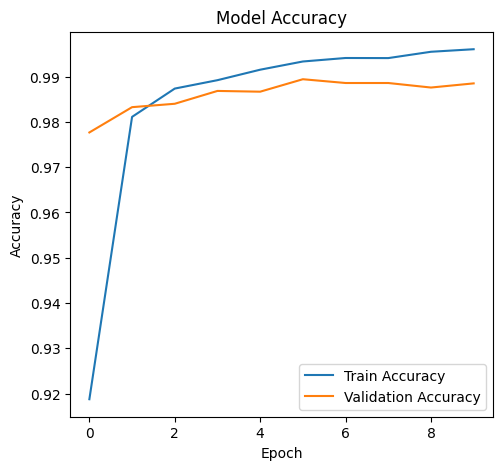

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation accuracy loss values

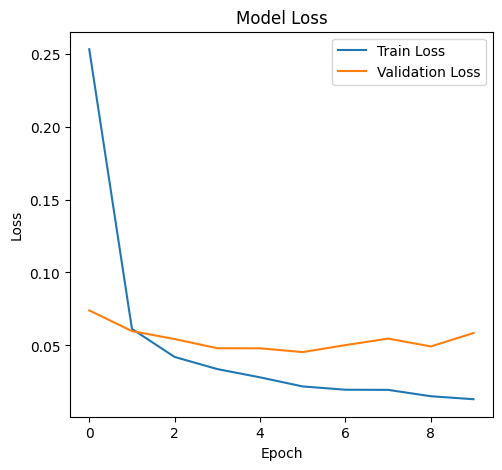

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Save the Model

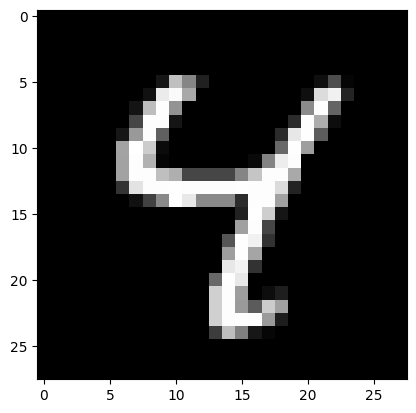

In [30]:
model.save('mnist_cnn_model.h5')
plt.imshow(x_test[6],cmap='gray')  # Display the image index 6

In [29]:
x = np.reshape(x_test[6], (1, 28, 28, 1)) # Reshapes the image at index 6
np.argmax(model.predict(x))  # Predict the class of the image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


4